In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

%matplotlib inline

In [29]:
# Open the data
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  82 non-null     int64  
 1   gender                  82 non-null     int64  
 2   age                     82 non-null     int64  
 3   family                  82 non-null     int64  
 4   education               81 non-null     float64
 5   years_of_service        80 non-null     float64
 6   salary                  82 non-null     int64  
 7   sat_management          82 non-null     int64  
 8   sat_colleques           81 non-null     float64
 9   sat_workingEnvironment  82 non-null     int64  
 10  sat_salary              82 non-null     int64  
 11  sat_tasks               82 non-null     int64  
 12  healtcare               47 non-null     float64
 13  holidayCabin            20 non-null     float64
 14  gym                     9 non-null      floa

In [37]:
# Count the number of male (1) and female (2) workers
gender_count = df['gender'].value_counts().reindex([1, 2], fill_value=0)

# Calculate the percentage of each gender
gender_percentage = (gender_count / gender_count.sum()) * 100

# Rename the index to reflect 1 as "Men" and 2 as "Women"
gender_percentage.index = ['Men', 'Women']

# Print the gender percentages
print("Gender Percentages:")
print(gender_percentage)


Gender Percentages:
Men      76.829268
Women    23.170732
Name: count, dtype: float64


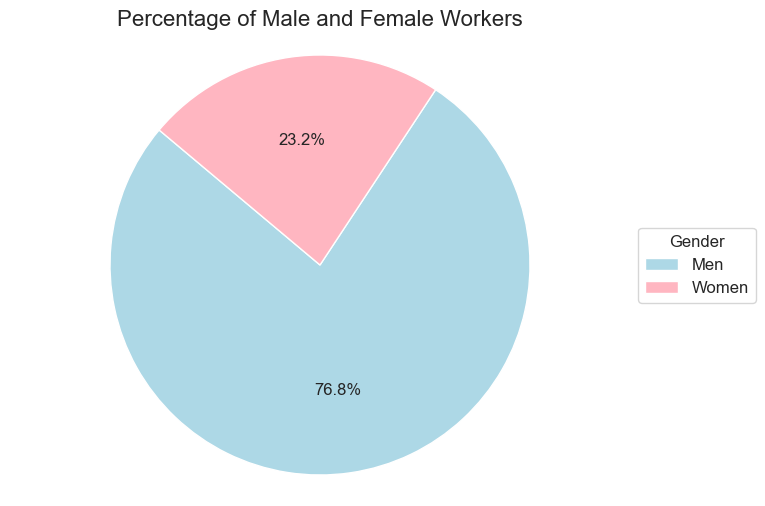

In [41]:
# Plotting a pie chart for gender percentages
plt.figure(figsize=(8, 6))

# Create the pie chart with custom label positions
wedges, texts, autotexts = plt.pie(gender_percentage, 
                                   labels=None, 
                                   autopct='%1.1f%%', 
                                   startangle=140, 
                                   colors=['lightblue', 'lightpink'])

# Draw the lines connecting the labels to the pie slices
for i, text in enumerate(texts):
    text.set_color(wedges[i].get_facecolor())  # Set label color to slice color
    text.set_fontsize(12)  # Adjust font size for labels
    # Move labels out
    text.set_position((text.get_position()[0] * 1.15, text.get_position()[1] * 1.15))  

# Add custom labels to the pie chart
plt.legend(wedges, gender_percentage.index, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

# Set the title
plt.title('Percentage of Male and Female Workers', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

plt.show()


In [42]:
# Define age bins and labels for the age ranges
age_bins = [18, 25, 35, 50, 65]
age_labels = ['18-25', '25-35', '35-50', '50-65']

# Create a new column 'age_group' based on the age bins
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of workers in each age group
age_group_count = df['age_group'].value_counts(sort=False)

# Print the counts
print("Age Group Count:")
print(age_group_count)


Age Group Count:
age_group
18-25     6
25-35    25
35-50    39
50-65    12
Name: count, dtype: int64


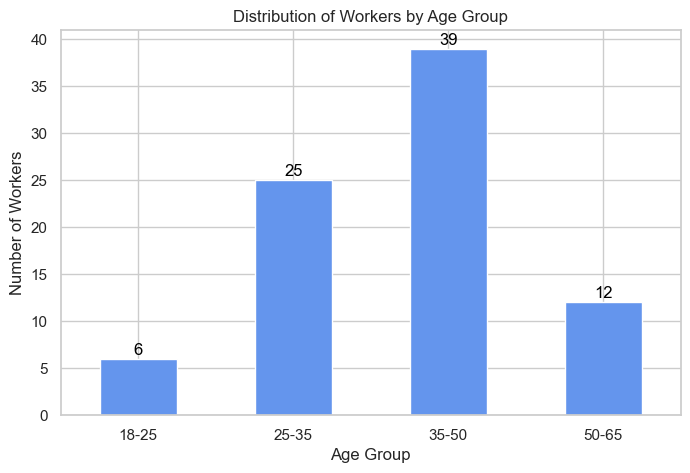

In [34]:
# Plot the age group distribution
plt.figure(figsize=(8, 5))
ax = age_group_count.plot(kind='bar', color='cornflowerblue')  # Assign plot to 'ax'
plt.title('Distribution of Workers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Workers')
plt.xticks(rotation=0)

# Add labels on bars
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3), textcoords='offset points')

plt.show()



In [35]:
# Group by age group and gender, then count
age_gender_group = df.groupby(['age_group', 'gender']).size().unstack(fill_value=0)

# Print the table to see how many males and females are in each age group
print("Age Group and Gender Distribution:")
print(age_gender_group)


Age Group and Gender Distribution:
gender      1   2
age_group        
18-25       5   1
25-35      23   2
35-50      27  12
50-65       8   4


C:\Users\leski\AppData\Local\Temp\ipykernel_6848\1619393315.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_group = df.groupby(['age_group', 'gender']).size().unstack(fill_value=0)


C:\Users\leski\AppData\Local\Temp\ipykernel_6848\2025209505.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_group = df.groupby(['age_group', 'gender']).size().unstack(fill_value=0)


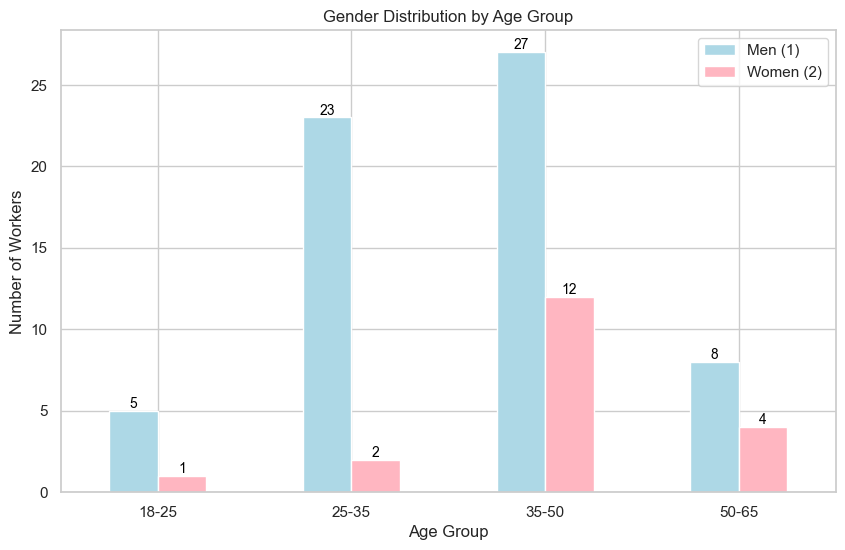

In [43]:
# Group by age group and gender, then count
age_gender_group = df.groupby(['age_group', 'gender']).size().unstack(fill_value=0)

# Plot the age group and gender distribution as a grouped bar chart
ax = age_gender_group.plot(kind='bar', color=['lightblue', 'lightpink'], figsize=(10, 6), position=0.5)
plt.title('Gender Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Workers')
plt.xticks(rotation=0)

# Adjust the legend to correctly reflect 1 = Male and 2 = Female
plt.legend(['Men (1)', 'Women (2)'])

# Add labels on bars for both genders
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.show()
